In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats # 假设检验

In [2]:
#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

## bank client data|名词变量对照解释

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
|1| age|| numeric||
 |2|job|type of job| categorical| "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"|
   |3|marital|marital status |categorical| "married","divorced","single"; note| "divorced" means divorced or widowed|
   |4|education ||categorical| "unknown","secondary","primary","tertiary"|
   |5|default| has credit in default?|binary| "yes","no"|
   |6|balance| average yearly balance, in euros |numeric |
   |7|housing| has housing loan?| binary| "yes","no"|
   |8|loan| has personal loan?| binary| "yes","no"|


related with the last contact of the current campaign
   
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
   |9|contact| contact communication type |categorical| "unknown","telephone","cellular" |
  |10|day| last contact day of the month |numeric|
  |11|month| last contact month of year |categorical| "jan", "feb", "mar", ..., "nov", "dec"|
  |12|duration| last contact duration, in seconds |numeric|

other attributes

|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |13|campaign| number of contacts performed during this campaign and for this client numeric, includes last contact|numeric|
  |14|pdays| number of days that passed by after the client was last contacted from a previous campaign |numeric| -1 means client was not previously contacted|
  |15|previous| number of contacts performed before this campaign and for this client |numeric|
  |16|poutcome| outcome of the previous marketing campaign |categorical| "unknown","other","failure","success"|

  Output variable desired target
  
|编号|变量名|解释|类型|取值|
|----|-------|--------|---|---|
  |17|y|has the client subscribed a term deposit| binary| "yes","no"|

In [3]:
# 导入数据
df = pd.read_csv("bank-full.csv", sep = ';') # 含测试集的全部数据
test = pd.read_csv("bank.csv",sep = ';') # 测试集

# 查看数据大小
print("bank-full.csv:", df.shape,"\n")
print("测试集", test.shape,"\n")

bank-full.csv: (45211, 17) 

测试集 (4521, 17) 



In [4]:
# 缺失值
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# 查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 去掉测试集

In [7]:
df = df.append(test)
df.drop_duplicates(keep = False, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 预处理

## 类型变量

In [8]:
# 找到类型变量
categorical_variables = df.columns[df.dtypes == "object"]
print(categorical_variables)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [9]:
# 查看数据分布
for var in categorical_variables:
    print("【变量名%s:】"%var)
    print(df[var].value_counts(),"\n","-"*30)

【变量名job:】
blue-collar      8786
management       8489
technician       6829
admin.           4693
services         3737
retired          2034
self-employed    1396
entrepreneur     1319
unemployed       1175
housemaid        1128
student           854
unknown           250
Name: job, dtype: int64 
 ------------------------------
【变量名marital:】
married     24417
single      11594
divorced     4679
Name: marital, dtype: int64 
 ------------------------------
【变量名education:】
secondary    20896
tertiary     11951
primary       6173
unknown       1670
Name: education, dtype: int64 
 ------------------------------
【变量名default:】
no     39951
yes      739
Name: default, dtype: int64 
 ------------------------------
【变量名housing:】
yes    22571
no     18119
Name: housing, dtype: int64 
 ------------------------------
【变量名loan:】
no     34137
yes     6553
Name: loan, dtype: int64 
 ------------------------------
【变量名contact:】
cellular     26389
unknown      11696
telephone     2605
Name: contact, dt

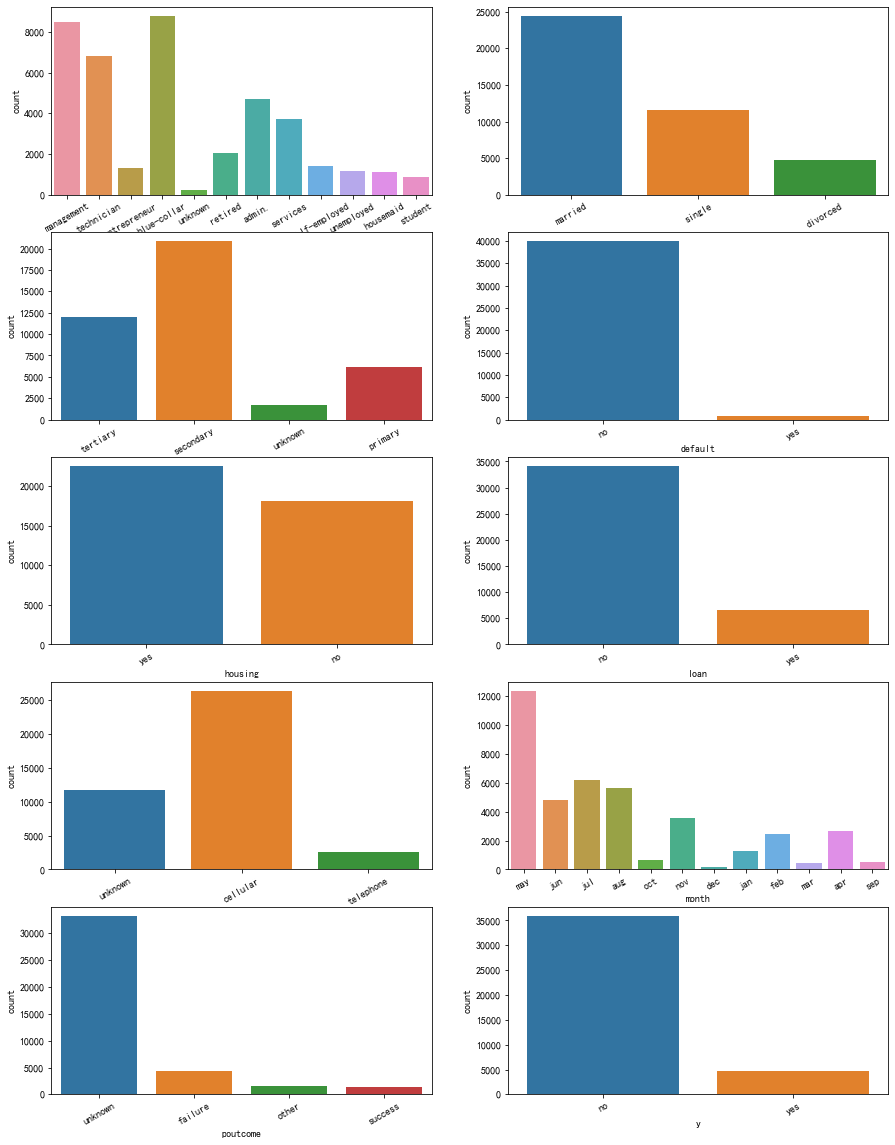

In [10]:
# 画柱状图
cat_plot_id = len(categorical_variables)+1
cat_nrows = int(cat_plot_id/2)

plt.figure(figsize=(15, 20))
for i in range(1, cat_plot_id):
    plt.subplot(cat_nrows, 2, i)
    # 用countplot()画出柱状图
    sns.countplot(x=categorical_variables[i-1], data=df)
    plt.xticks(rotation=30)

### 处理一下y

In [11]:
df["y"] = df["y"].apply(lambda x: 1 if x == "yes" else 0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
test["y"] = test["y"].apply(lambda x: 1 if x == "yes" else 0)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


### 针对job: admin和management到底是不是一类数据

In [13]:
# t-test: balance
print("检查balance:\n",
      stats.ttest_ind(df[df["job"] == "admin."]["balance"], df[df["job"] == "management"]["balance"]))

# t-test: age
print("检查age:\n",
      stats.ttest_ind(df[df["job"] == "admin."]["age"], df[df["job"] == "management"]["age"]))

检查balance:
 Ttest_indResult(statistic=-10.005424159346354, pvalue=1.7496799030869774e-23)
检查age:
 Ttest_indResult(statistic=-6.963480490421425, pvalue=3.4770218783300235e-12)


### 修改之前联系过，但是poutcome为unknown的情况

In [14]:
# 有多少顾客之前没有联系过？
df["是否联系过"] = df["pdays"].apply(lambda x: 0 if x == -1 else 1)
print(df["是否联系过"].value_counts())

# 在测试集里也构造该列
test["是否联系过"] = test["pdays"].apply(lambda x: 0 if x == -1 else 1)

0    33249
1     7441
Name: 是否联系过, dtype: int64


In [15]:
# 被影响的变量
effect_variables = ["previous","poutcome","contact"]

# 分类统计
temp2 = df.groupby(by = ["是否联系过","poutcome","contact"], as_index = False)["age"].agg({"num":"count"})
# 占比统计
temp2["prop"] = temp2["num"]/temp2["num"].sum()

temp2.sort_values(by = "prop", ascending = False, inplace = True)
temp2

,是否联系过,poutcome,contact,num,prop
0,0,unknown,cellular,19565,0.480831
2,0,unknown,unknown,11637,0.285992
3,1,failure,cellular,4082,0.100319
1,0,unknown,telephone,2047,0.050307
6,1,other,cellular,1466,0.036029
9,1,success,cellular,1271,0.031236
4,1,failure,telephone,302,0.007422
7,1,other,telephone,155,0.003809
10,1,success,telephone,101,0.002482
5,1,failure,unknown,27,0.000664


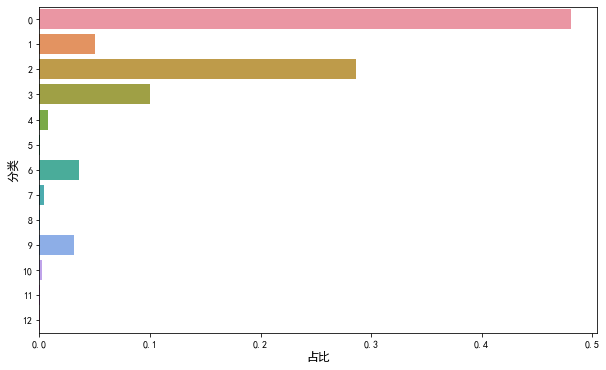

In [16]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = temp2.index, x = temp2["prop"], orient = "h")
plt.ylabel(ylabel = "分类",size = 12)
plt.xlabel(xlabel = "占比",size = 12)
plt.show()

In [17]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["poutcome"] == "unknown")].index
df.loc[edit_index]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,是否联系过
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,1,1
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,0,1
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,1,1
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,0,1
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,0,1


In [18]:
# 寻找众数
fill_val = df[df["是否联系过"] == 1]["poutcome"].mode()[0]
fill_val

'failure'

In [19]:
# 填充
df.loc[edit_index, "poutcome"] = fill_val
df.loc[edit_index,"poutcome"]

40658    failure
41821    failure
42042    failure
43978    failure
45021    failure
Name: poutcome, dtype: object

In [20]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) &(test["poutcome"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["poutcome"].mode()[0]

# 填充
test.loc[edit_index, "poutcome"] = fill_val
test.loc[edit_index,"poutcome"]

Series([], Name: poutcome, dtype: object)

### 修改之前联系过，却unknown contact的情况

使用众数填充

In [21]:
# 找训练集里的数据
edit_index = df[(df["是否联系过"] == 1) &(df["contact"] == "unknown")].index
df.loc[edit_index,"contact"]

24080    unknown
24136    unknown
24160    unknown
24364    unknown
24405    unknown
24415    unknown
24611    unknown
24624    unknown
24721    unknown
25060    unknown
41604    unknown
42228    unknown
43115    unknown
43121    unknown
43171    unknown
43226    unknown
43727    unknown
43802    unknown
43837    unknown
43839    unknown
43854    unknown
43884    unknown
43887    unknown
43905    unknown
43983    unknown
44036    unknown
44052    unknown
44053    unknown
44061    unknown
44062    unknown
44122    unknown
44243    unknown
44251    unknown
44259    unknown
44260    unknown
44478    unknown
44489    unknown
44546    unknown
44591    unknown
44599    unknown
44604    unknown
44647    unknown
44683    unknown
44687    unknown
44699    unknown
44758    unknown
44782    unknown
44785    unknown
44822    unknown
44832    unknown
44837    unknown
44840    unknown
44848    unknown
44906    unknown
44948    unknown
44965    unknown
44983    unknown
44989    unknown
45136    unkno

In [22]:
# 寻找众数
fill_val = df[df["是否联系过"] == 1]["contact"].mode()[0]
fill_val

'cellular'

In [23]:
# 填充
df.loc[edit_index, "contact"] = fill_val
df.loc[edit_index, "contact"]

24080    cellular
24136    cellular
24160    cellular
24364    cellular
24405    cellular
24415    cellular
24611    cellular
24624    cellular
24721    cellular
25060    cellular
41604    cellular
42228    cellular
43115    cellular
43121    cellular
43171    cellular
43226    cellular
43727    cellular
43802    cellular
43837    cellular
43839    cellular
43854    cellular
43884    cellular
43887    cellular
43905    cellular
43983    cellular
44036    cellular
44052    cellular
44053    cellular
44061    cellular
44062    cellular
44122    cellular
44243    cellular
44251    cellular
44259    cellular
44260    cellular
44478    cellular
44489    cellular
44546    cellular
44591    cellular
44599    cellular
44604    cellular
44647    cellular
44683    cellular
44687    cellular
44699    cellular
44758    cellular
44782    cellular
44785    cellular
44822    cellular
44832    cellular
44837    cellular
44840    cellular
44848    cellular
44906    cellular
44948    cellular
44965    c

In [24]:
# 用相同方法修改测试集

# 找训练集里的数据
edit_index = test[(test["是否联系过"] == 1) & (test["contact"] == "unknown")].index

# 寻找众数
fill_val = test[test["是否联系过"] == 1]["contact"].mode()[0]

# 填充
test.loc[edit_index, "contact"] = fill_val
test.loc[edit_index, "contact"]

40      cellular
1106    cellular
1167    cellular
1223    cellular
1343    cellular
1707    cellular
2103    cellular
2529    cellular
3134    cellular
3652    cellular
4073    cellular
Name: contact, dtype: object

admin和management不属于同一类数据，不能合并

## 连续型变量

In [25]:
from scipy import stats # 假设检验

In [26]:
numeric_variables = list(set(df.columns)- set(categorical_variables))
numeric_variables

['balance', 'age', 'campaign', 'previous', 'duration', 'day', 'pdays', '是否联系过']

### duration：是否要舍弃这个变量

duration: last contact duration, in seconds (numeric). 

**Important note:**

this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [27]:
# 查看duration 为 0 的情况，只有3条数据
df[(df.duration ==0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,是否联系过
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,0,0
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,0,0
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,0,0


In [28]:
### t-test: duration

### 查看两组变量(yes/no)的duration的平均值是否相同
stats.ttest_ind(df[df.y == 0]["duration"], df[df.y == 1]["duration"])

Ttest_indResult(statistic=-86.4224997377835, pvalue=0.0)

In [29]:
### 相关性检验
df.corr()["duration"]

age        -0.004965
balance     0.025662
day        -0.030864
duration    1.000000
campaign   -0.086424
pdays      -0.002893
previous   -0.000105
y           0.393820
是否联系过       0.002305
Name: duration, dtype: float64

**p值等于0，具有显著差异; 相关系数为0.39**

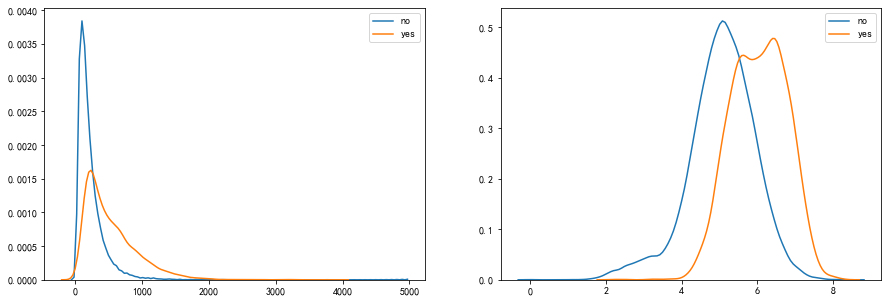

In [30]:
### 概率密度函数
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.kdeplot(df[df.y == 0]["duration"])
sns.kdeplot(df[df.y == 1]["duration"])
plt.legend(labels = ["no","yes"])

### 概率密度函数
plt.subplot(122)
sns.kdeplot(np.log(df[df.y == 0]["duration"]+1))
sns.kdeplot(np.log(df[df.y == 1]["duration"]+1))
plt.legend(labels = ["no","yes"])
plt.show()

In [31]:
### 取对数，查看两组变量(yes/no)的duration的平均值是否相同
stats.ttest_ind(np.log(df[df.y == 0]["duration"]+1), np.log(df[df.y == 1]["duration"]+1))

Ttest_indResult(statistic=-73.56896687670078, pvalue=0.0)

In [32]:
# 去掉duration
df.drop(columns = "duration", inplace = True)
test.drop(columns = "duration", inplace = True)

# 特征工程

## 构造时间

In [33]:
# 创建时间
df["ymd"] = pd.to_datetime("2011-"+df["month"] +"-" + df["day"].astype(str))

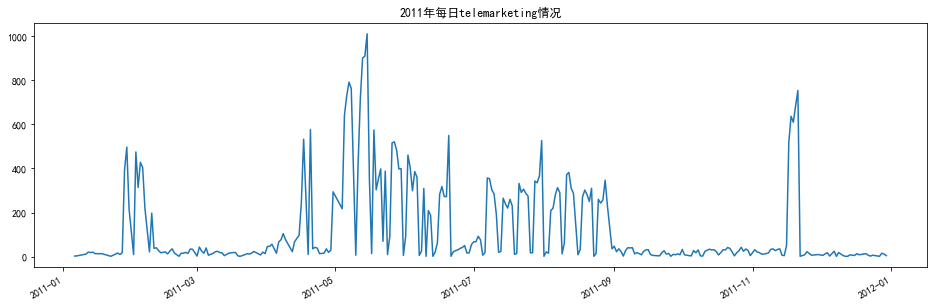

In [34]:
# 查看一整年的营销活动
plt.figure(figsize = (16,5))
df["ymd"].value_counts().plot()
plt.title("2011年每日telemarketing情况")
plt.show()

In [35]:
# 提取星期
df["weekday"] = df["ymd"].dt.dayofweek+1
df["weekday"].value_counts()

6    8499
5    7983
7    7801
4    7341
1    4874
3    3676
2     516
Name: weekday, dtype: int64

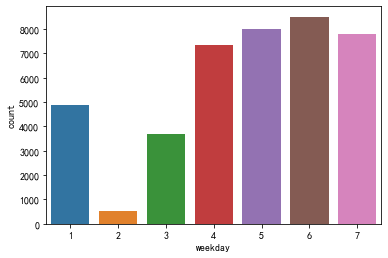

In [36]:
# 从weekday的分布上来看，3和2更可能是周日和周六
# 但是，因为weekday是一个categorical variable，所以具体的值也就不重要了
df["weekday"] = df["weekday"].astype(str)

# 画图
sns.countplot(df["weekday"])

In [37]:
# 修改测试集
test["ymd"] = pd.to_datetime("2011-"+test["month"] +"-" + test["day"].astype(str))
test["weekday"] = test["ymd"].dt.dayofweek+1
test["weekday"] = test["weekday"].astype(str)

In [38]:
# 删除数据
#drop_columns =["day","ymd"]
drop_columns = ['ymd']
df.drop(columns = drop_columns, inplace = True)
test.drop(columns = drop_columns, inplace = True)

## total_call: 一共打了多少电话

In [39]:
# total_call = previous + campaign
df["total_call"] = df["previous"] + df["campaign"]

# reshape
total_call = df["total_call"].values.reshape(-1,1)

In [40]:
# 在测试集上修改
test["total_call"] = test["previous"] + test["campaign"]

## 去掉previous，因为有了“是否联系过”作为dummy

In [41]:
# # 去掉previous
# df.drop(columns = ["previous"], inplace = True)
# test.drop(columns = ["previous"], inplace = True)

## 去掉pdays

In [42]:
# 去掉pdays
df.drop(columns = ["pdays"], inplace = True)
test.drop(columns = ["pdays"], inplace = True)

## 从过去模型里可以知道，去掉default

In [43]:
# 去掉pdays
df.drop(columns = ["default"], inplace = True)
test.drop(columns = ["default"], inplace = True)

# 从categorical_variables里去掉它
categorical_variables.remove('default')

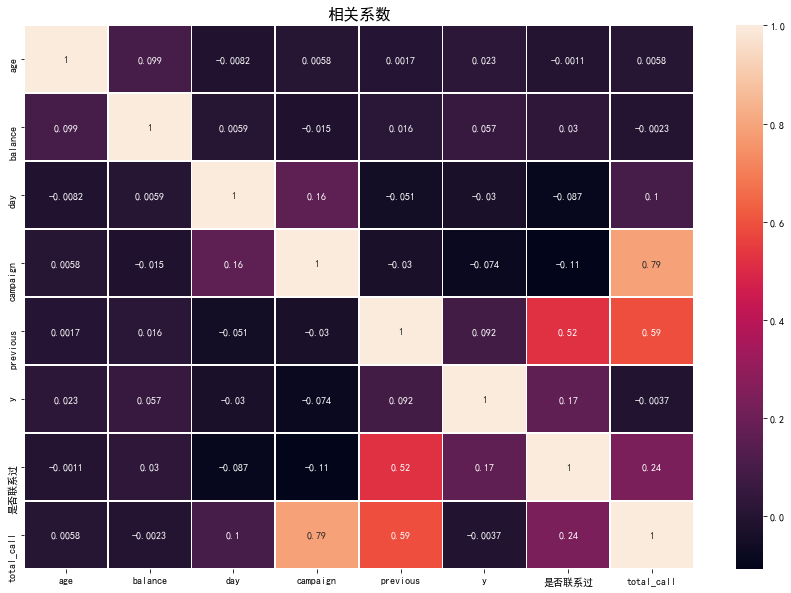

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=.5)
plt.title("相关系数",size = 16)
plt.show()

## 数据转换

In [45]:
# 修改为数字
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
for var in categorical_variables:
    df[var] = df[var].astype('category').cat.codes
    test[var] = test[var].astype("category").cat.codes
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,是否联系过,weekday,total_call
0,58,4,1,2,2143,1,0,2,5,8,1,0,3,0,0,4,1
1,44,9,2,1,29,1,0,2,5,8,1,0,3,0,0,4,1
2,33,2,1,1,2,1,1,2,5,8,1,0,3,0,0,4,1
3,47,1,1,3,1506,1,0,2,5,8,1,0,3,0,0,4,1
4,33,11,2,3,1,0,0,2,5,8,1,0,3,0,0,4,1


In [52]:
# 查看数据分布
for var in categorical_variables:
    print("【变量名%s:】"%var)
    print(df[var].value_counts(),"\n","-"*30)

【变量名contact:】
0    26448
2    11637
1     2605
Name: contact, dtype: int64 
 ------------------------------
【变量名education:】
1    20896
2    11951
0     6173
3     1670
Name: education, dtype: int64 
 ------------------------------
【变量名marital:】
1    24417
2    11594
0     4679
Name: marital, dtype: int64 
 ------------------------------
【变量名poutcome:】
3    33249
0     4416
1     1643
2     1382
Name: poutcome, dtype: int64 
 ------------------------------
【变量名y:】
0    35922
1     4768
Name: y, dtype: int64 
 ------------------------------
【变量名housing:】
1    22571
0    18119
Name: housing, dtype: int64 
 ------------------------------
【变量名month:】
8     12368
5      6189
1      5614
6      4810
9      3581
0      2639
3      2427
4      1255
10      658
11      527
7       428
2       194
Name: month, dtype: int64 
 ------------------------------
【变量名loan:】
0    34137
1     6553
Name: loan, dtype: int64 
 ------------------------------
【变量名job:】
1     8786
4     8489
9     6829
0     469

# RandomForest

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

seed = 12345

In [54]:
# 准备训练集
var_x = list(set(df.columns) - set("y")) # 自变量
train_x, train_y = df[var_x],df["y"]

# 准备测试集
test_x, test_y = test[var_x],test["y"]

## 初步建立模型

In [55]:
rf_1 = RandomForestClassifier(criterion = "gini",
                             n_estimators = 100,
                             #min_sample_split = 200,
                             max_features = "sqrt",
                             bootstrap = True,
                             oob_score = True,
                             class_weight = "balanced",
                             random_state = seed)
rf_1.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=12345,
                       verbose=0, warm_start=False)

In [56]:
from sklearn.metrics import confusion_matrix

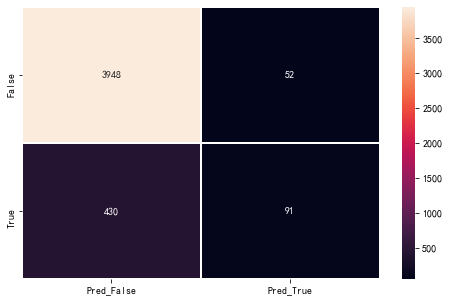

In [57]:
# 预测结果
rf_1_predict = rf_1.predict(test_x)

# confusion matrix
cm1 = confusion_matrix(test_y, rf_1_predict)

#画图
plt.figure(figsize = (8,5))
sns.heatmap(cm1,annot = True, fmt = '.5g', linewidths = 0.5, yticklabels = ["False","True"], xticklabels = ["Pred_False","Pred_True"])
plt.show()

In [58]:
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.64      0.17      0.27       521

    accuracy                           0.89      4521
   macro avg       0.77      0.58      0.61      4521
weighted avg       0.87      0.89      0.87      4521



## 一些指标

In [59]:
from sklearn.metrics import accuracy_score # 准确率
from sklearn.metrics import precision_score # 精确率
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report # 分类报告
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [60]:
# 准确率
accuracy_score(test_y, rf_1_predict)

0.8933864189338642

In [61]:
# 精确率
precision_score(test_y, rf_1_predict)

0.6363636363636364

In [62]:
# 分类报告
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.64      0.17      0.27       521

    accuracy                           0.89      4521
   macro avg       0.77      0.58      0.61      4521
weighted avg       0.87      0.89      0.87      4521



## 重采样

In [63]:
from sklearn.model_selection import train_test_split # 划分训练集

In [64]:
# 训练集中正负样本比例：
bin_count = np.bincount(df['y'])
print("正负样本：",bin_count)
print("正负样本比例：",bin_count[0]/ bin_count[1])

正负样本： [35922  4768]
正负样本比例： 7.533976510067114


In [65]:
def F1(precision, recall):

    '''
    7、综合评价指标（F-Measure）
    P和R指标有时候会出现的矛盾的情况，这样就需要综合考虑他们，最常见的方法就是F-Measure（又称为F-Score）。
    F-Measure是Precision和Recall加权调和平均：
    
    可知F1综合了P和R的结果，当F1较高时则能说明试验方法比较有效。
    '''
    return (2 * precision * recall)/(precision+recall)

### 验证集不重采样

In [66]:
# 首先划分出测试集和验证集
mydf = df.copy(deep=True)
X_train, X_valid, y_train, y_valid = train_test_split(mydf[var_x], 
                                                          mydf["y"], random_state=seed, test_size=0.25)

# 需要重复的部分
repeat_mask = y_train == 1
X_train_repeat = X_train[repeat_mask]
y_train_repeat = y_train[repeat_mask]

In [67]:
#多次重采样，并且使用随机森林，在验证集上查看结果
n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
predict_result = [] # 预测结果



# 循环
for i in n_resample:
    print("重采样中：n = %d" % (i+1))
    
    # 只重采样X_train, y_train
    X_train = X_train.append(X_train_repeat)
    y_train = y_train.append(y_train_repeat)


    # 随机森林
    print("拟合中...")
    rf_n = RandomForestClassifier(criterion="entropy",
                                  n_estimators=100,
                                  random_state=seed,
                                  #min_sample_split = 200,
                                  max_features="sqrt",
                                  bootstrap=True,
                                  oob_score=True,
                                  class_weight="balanced")
    rf_n.fit(X_train, y_train)

    # 预测结果
    print("预测中...")
    rf_n_predict = rf_n.predict(X_valid)
    predict_result.append(rf_n_predict)

    # 模型评估
    pre_score = precision_score(y_valid, rf_n_predict)
    acc_score = accuracy_score(y_valid, rf_n_predict)
    rec_score = recall_score(y_valid, rf_n_predict)
    f1_score = F1(pre_score, rec_score)

    accuracy_scores.append(acc_score)
    precision_scores.append(pre_score)
    recall_scores.append(rec_score)
    f1_scores.append(f1_score)
    print("precision:", pre_score)
    print("accuracy:", acc_score)
    print("recall:", rec_score)
    print("f1:", f1_score)

    print("-"*30)

重采样中：n = 1
拟合中...
预测中...
precision: 0.5227272727272727
accuracy: 0.8871522658016318
recall: 0.25468483816013626
f1: 0.34249713631156925
------------------------------
重采样中：n = 2
拟合中...
预测中...
precision: 0.5068702290076336
accuracy: 0.8854811756610635
recall: 0.282793867120954
f1: 0.363039912520503
------------------------------
重采样中：n = 3
拟合中...
预测中...
precision: 0.4977973568281938
accuracy: 0.8843015826206625
recall: 0.2887563884156729
f1: 0.3654986522911051
------------------------------
重采样中：n = 4
拟合中...
预测中...
precision: 0.4853801169590643
accuracy: 0.8826304924800944
recall: 0.282793867120954
f1: 0.3573735199138859
------------------------------
重采样中：n = 5
拟合中...
预测中...
precision: 0.47375886524822697
accuracy: 0.8809594023395262
recall: 0.28449744463373083
f1: 0.3555082490686535
------------------------------
重采样中：n = 6
拟合中...
预测中...
precision: 0.48563218390804597
accuracy: 0.8826304924800944
recall: 0.2879045996592845
f1: 0.3614973262032085
------------------------------
重采样中：n =

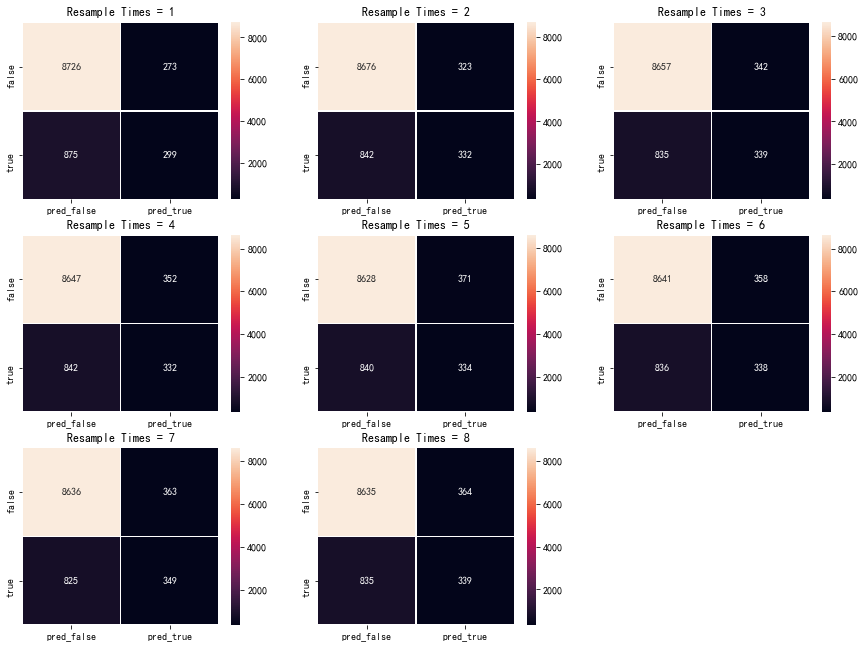

In [68]:
# 验证集混淆矩阵
plt.figure(figsize = (15,15))
for i in n_resample:
    plt.subplot(4,3,i+1)
    sns.heatmap(confusion_matrix(y_valid, predict_result[i]), linewidth = 0.5, annot = True, fmt = '.5g',
               yticklabels = ['false',"true"], xticklabels = ["pred_false",'pred_true'])
    plt.title("Resample Times = %d" %(i+1))
plt.show() 

In [69]:
# 重采样后的模型评估
model_eval_1 = pd.DataFrame({
    'resample_times': n_resample,
    "accuracy": accuracy_scores,
    "precision": precision_scores,
    "recall": recall_scores,
    "f1": f1_scores
})
model_eval_1 

,resample_times,accuracy,precision,recall,f1
0,0,0.887152,0.522727,0.254685,0.342497
1,1,0.885481,0.506870,0.282794,0.363040
2,2,0.884302,0.497797,0.288756,0.365499
3,3,0.882630,0.485380,0.282794,0.357374
4,4,0.880959,0.473759,0.284497,0.355508
5,5,0.882630,0.485632,0.287905,0.361497
6,6,0.883220,0.490169,0.297274,0.370095
7,7,0.882139,0.482219,0.288756,0.361215


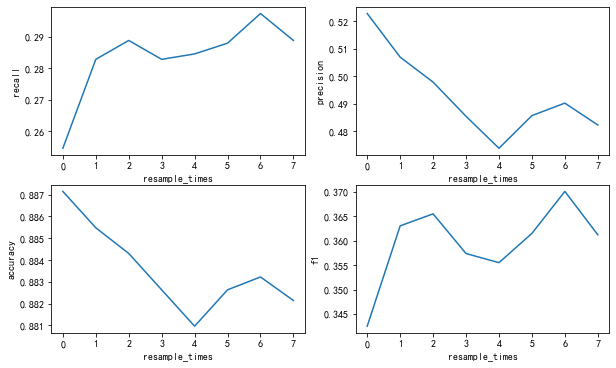

In [70]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.lineplot(x = "resample_times", y = "recall", data = model_eval_1)
plt.subplot(2,2,2)
sns.lineplot(x = "resample_times", y = "precision", data = model_eval_1)
#plt.legend(labels = ["recall","precision"])

plt.subplot(2,2,3)
sns.lineplot(x = "resample_times", y = "accuracy", data = model_eval_1)
plt.subplot(2,2,4)

sns.lineplot(x = "resample_times", y = "f1", data = model_eval_1)
plt.show()

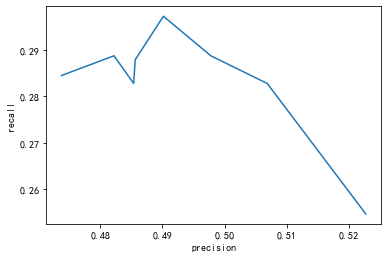

In [71]:
sns.lineplot(x = "precision", y = "recall", data = model_eval_1)

### 含验证集重采样

In [72]:
# 多次重采样，并且使用随机森林，在验证集上查看结果
n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
predict_result = [] # 预测结果
y_valid_sets = [] # 记录一下不同的验证集y


# 循环
for i in n_resample:
    print("重采样中：n = %d" % (i+1))
    mydf = mydf.append(df[df.y == 1])
    # 划出验证集
    X_train, X_valid, y_train, y_valid = train_test_split(mydf[var_x], 
                                                          mydf["y"], random_state=seed, test_size=0.25)
    y_valid_sets.append(y_valid)

    # 随机森林
    print("拟合中...")
    rf_n = RandomForestClassifier(criterion="entropy",
                                  n_estimators=100,
                                  random_state=seed,
                                  #min_sample_split = 200,
                                  max_features="sqrt",
                                  bootstrap=True,
                                  oob_score=True,
                                  class_weight="balanced")
    rf_n.fit(X_train, y_train)

    # 预测结果
    print("预测中...")
    rf_n_predict = rf_n.predict(X_valid)
    predict_result.append(rf_n_predict)

    # 模型评估
    pre_score = precision_score(y_valid, rf_n_predict)
    acc_score = accuracy_score(y_valid, rf_n_predict)
    rec_score = recall_score(y_valid, rf_n_predict)
    f1_score = F1(pre_score, rec_score)

    accuracy_scores.append(acc_score)
    precision_scores.append(pre_score)
    recall_scores.append(rec_score)
    f1_scores.append(f1_score)
    print("precision:", pre_score)
    print("accuracy:", acc_score)
    print("recall:", rec_score)
    print("f1:", f1_score)

    print("-"*30)

重采样中：n = 1
拟合中...
预测中...
precision: 0.8682926829268293
accuracy: 0.9346238451385833
recall: 0.8144758735440932
f1: 0.840523717535952
------------------------------
重采样中：n = 2
拟合中...
预测中...
precision: 0.8985774499473129
accuracy: 0.9538902604125189
recall: 0.9461858529819694
f1: 0.9217673287393594
------------------------------
重采样中：n = 3
拟合中...
预测中...
precision: 0.9117031398667935
accuracy: 0.9633427885664412
recall: 0.9917201407576072
f1: 0.950029744199881
------------------------------
重采样中：n = 4
拟合中...
预测中...
precision: 0.9271286513362337
accuracy: 0.9672712669834683
recall: 0.9966594287623184
f1: 0.9606375271673508
------------------------------
重采样中：n = 5
拟合中...
预测中...
precision: 0.9362228296238448
accuracy: 0.9692555631314697
recall: 0.9991665509098486
f1: 0.9666711463512969
------------------------------
重采样中：n = 6
拟合中...
预测中...
precision: 0.943445311616333
accuracy: 0.9711399711399712
recall: 1.0
f1: 0.9708997788383192
------------------------------
重采样中：n = 7
拟合中...
预测中...
pre

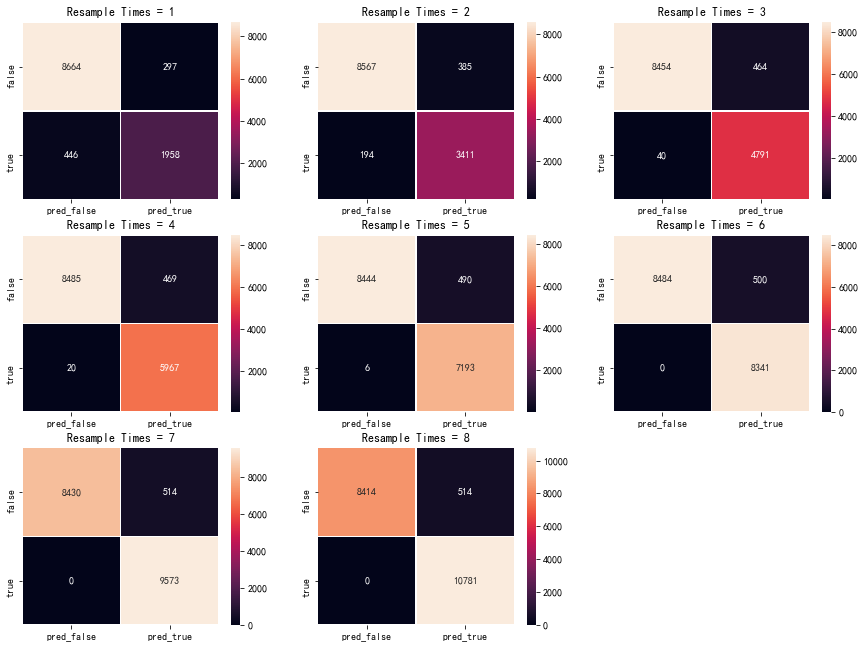

In [73]:
# 验证集混淆矩阵
plt.figure(figsize = (15,15))
for i in n_resample:
    plt.subplot(4,3,i+1)
    sns.heatmap(confusion_matrix(y_valid_sets[i], predict_result[i]), linewidth = 0.5, annot = True, fmt = '.5g',
               yticklabels = ['false',"true"], xticklabels = ["pred_false",'pred_true'])
    plt.title("Resample Times = %d" %(i+1))
plt.show() 

In [74]:
# 重采样后的模型评估
model_eval = pd.DataFrame({
    'resample_times': n_resample,
    "accuracy": accuracy_scores,
    "precision": precision_scores,
    "recall": recall_scores,
    "f1": f1_scores
})
model_eval

,resample_times,accuracy,precision,recall,f1
0,0,0.934624,0.868293,0.814476,0.840524
1,1,0.953890,0.898577,0.946186,0.921767
2,2,0.963343,0.911703,0.991720,0.950030
3,3,0.967271,0.927129,0.996659,0.960638
4,4,0.969256,0.936223,0.999167,0.966671
5,5,0.971140,0.943445,1.000000,0.970900
6,6,0.972242,0.949043,1.000000,0.973856
7,7,0.973921,0.954493,1.000000,0.976717


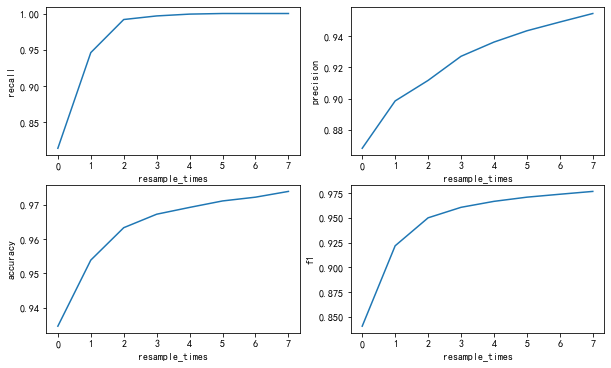

In [75]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.lineplot(x = "resample_times", y = "recall", data = model_eval)
plt.subplot(2,2,2)
sns.lineplot(x = "resample_times", y = "precision", data = model_eval)
#plt.legend(labels = ["recall","precision"])

plt.subplot(2,2,3)
sns.lineplot(x = "resample_times", y = "accuracy", data = model_eval)
plt.subplot(2,2,4)

sns.lineplot(x = "resample_times", y = "f1", data = model_eval)
plt.show()

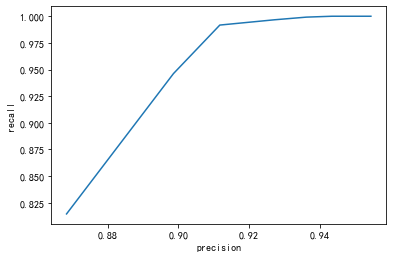

In [76]:
sns.lineplot(x = "precision", y = "recall", data = model_eval)
#sns.lineplot([0,0],[1,1])

## 调整超参

In [77]:
# test_set：把y=1的部分重复采样
i,n = 0, 3
mydf2 = df.copy(deep = True)
while i < n:
    mydf2 = mydf2.append(df[df.y==1])
    i+=1
mydf2.shape

(54994, 17)

In [78]:
# 正负样本数量
mydf2["y"].value_counts()

0    35922
1    19072
Name: y, dtype: int64

In [79]:
# train test split
X_train, X_valid, y_train, y_valid = train_test_split(mydf2[var_x],
                                                      mydf2["y"], random_state=seed, test_size=0.25)

### 调整n_estimator

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# n_resample = np.arange(int(bin_count[0] / bin_count[1])+1)
# precision_scores, recall_scores, accuracy_scores, f1_scores = [], [], [], [] # 模型评估
# predict_result = [] # 预测结果
# for i in range(100,1000,100):
#     rfc = RandomForestClassifier(criterion="gini",
#                                   n_estimators=i,
#                                   random_state=seed,
#                                   oob_score=True,
#                                   class_weight="balanced")
    
#     # 拟合
#     rfc.fit(X_train, y_train)

#     # 预测结果
#     print("n_estimator = ",i,",预测中...")
#     rfc_predict = rfc.predict(X_valid)
#     predict_result.append(rfc_predict)
    
#     # 模型评估
#     pre_score = precision_score(y_valid, rfc_predict)
#     acc_score = accuracy_score(y_valid, rfc_predict)
#     rec_score = recall_score(y_valid, rfc_predict)
#     f1_score = F1(pre_score, rec_score)

#     accuracy_scores.append(acc_score)
#     precision_scores.append(pre_score)
#     recall_scores.append(rec_score)
#     f1_scores.append(f1_score)
#     print("precision:", pre_score)
#     print("accuracy:", acc_score)
#     print("recall:", rec_score)
#     print("f1:", f1_score)
#     print("-"*30)

In [82]:
# # 重采样后的模型评估
# model_n_estimator = pd.DataFrame({
#     'n_estimator': range(50,500,50),
#     "accuracy": accuracy_scores,
#     "precision": precision_scores,
#     "recall": recall_scores,
#     "f1": f1_scores
# })
# model_n_estimator 

In [83]:
# # 画图
# plt.figure(figsize = (10,6))
# plt.subplot(2,2,1)
# sns.lineplot(x = "n_estimator", y = "recall", data = model_n_estimator)
# plt.subplot(2,2,2)
# sns.lineplot(x = "n_estimator", y = "precision", data = model_n_estimator)
# #plt.legend(labels = ["recall","precision"])

# plt.subplot(2,2,3)
# sns.lineplot(x = "n_estimator", y = "accuracy", data = model_n_estimator)
# plt.subplot(2,2,4)

# sns.lineplot(x = "n_estimator", y = "f1", data = model_n_estimator)
# plt.show()

In [84]:
# # 找到f1最大的地方
# max_f1 = model_n_estimator["f1"].max()
# model_n_estimator[model_n_estimator.f1 == max_f1]

In [85]:
rfc = RandomForestClassifier(random_state=seed,criterion = "gini")

# 用网格搜索调整
param_grid = {'n_estimators':range(50,500,50)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "recall")
GS.fit(mydf2[var_x], mydf2["y"])
best_param = GS.best_params_
best_score = GS.best_score_
n_e = best_param['n_estimators']
print(best_param, best_score)  

{'n_estimators': 50} 1.0


### 调整max_depth

In [86]:
# 建立n_estimators为n的随机森林
rfc = RandomForestClassifier(n_estimators=n_e, random_state=seed, criterion = "gini")

# 用网格搜索调整max_depth
param_grid = {'max_depth':range(1,25,5)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "recall")
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_d = best_param['max_depth']
print(best_param, best_score)  

{'max_depth': 21} 0.8821009760550523


In [87]:
# 建立n_estimators为n的随机森林
rfc = RandomForestClassifier(n_estimators=n_e, random_state=seed, criterion = "gini")

# 用网格搜索调整max_depth
param_grid = {'max_depth':range(18,26,1)}
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = "recall")
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_d = best_param['max_depth']
print(best_param, best_score)  

{'max_depth': 25} 0.915595814900639


### 调整max_feature

参照：https://zhuanlan.zhihu.com/p/126288078

In [88]:
# 用网格搜索调整max_features
param_grid = {'max_features': range(4,19,3)}

rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=m_d,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'recall')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_f = best_param['max_features']
print(best_param, best_score)

{'max_features': 10} 0.9083631767432062


In [89]:
# 用网格搜索调整max_features
param_grid = {'max_features': range(4,9,1)}

rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=m_d,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'recall')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_f = best_param['max_features']
print(best_param, best_score)

{'max_features': 7} 0.9075907590759075


### class_weight

In [90]:
# 用网格搜索调整max_features
param_grid = {'class_weight': ["balanced",None,"balanced_subsample"]}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             max_features = m_f,
                             random_state=seed,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'recall')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
c_w = best_param['class_weight']
print(best_param, best_score)

{'class_weight': None} 0.9198792219647496


### min_weight_fraction_leaf

In [91]:
# 用网格搜索调整max_features
param_grid = {'min_weight_fraction_leaf': np.arange(0, 10)/10000}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             max_features = m_f,
                             random_state=seed,
                            criterion = "gini",
                            class_weight = c_w)
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'recall')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
m_wf = best_param['min_weight_fraction_leaf']
print(best_param, best_score)

{'min_weight_fraction_leaf': 0.0} 0.9198792219647496


### min_sample_leaf

In [92]:
# 用网格搜索调整max_features
param_grid = {'min_samples_leaf': np.arange(0.1,50)/100}

rfc = RandomForestClassifier(n_estimators=n_e,
                             max_depth=m_d,
                             random_state=seed,
                             class_weight=c_w,
                             max_features = m_f,
                             min_weight_fraction_leaf = m_wf ,
                            criterion = "gini")
GS = GridSearchCV(rfc, param_grid, cv=3,scoring = 'recall')
GS.fit(X_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
msl = best_param ['min_samples_leaf']
print(best_param, best_score)

{'min_samples_leaf': 0.001} 0.5387964328347729


# 验证集

In [93]:
final_model = RandomForestClassifier(
    n_estimators=n_e,
    max_depth=m_d,
    random_state=seed,
    max_features=m_f,
    bootstrap=True,
    class_weight=c_w,
    criterion = "gini"
    ,
    min_samples_leaf = msl,
    min_samples_split = 2,
    min_weight_fraction_leaf = m_wf
)
# 训练模型
# final_model.fit(mydf2[var_x], mydf2["y"])
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.001, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [94]:
# 预测结果
predict_result = final_model.predict(test_x)

# 模型评估
pre_score = precision_score(test_y,predict_result)
acc_score = accuracy_score(test_y,predict_result)
rec_score = recall_score(test_y,predict_result)
f1_score = F1(pre_score, rec_score)
print('precision:' ,pre_score,
     "\naccuracy:",acc_score,
     "\nrecall:", rec_score,
     "\nf1:",f1_score)

precision: 0.4 
accuracy: 0.8582172085821721 
recall: 0.46065259117082535 
f1: 0.4281891168599465


## 画图对比

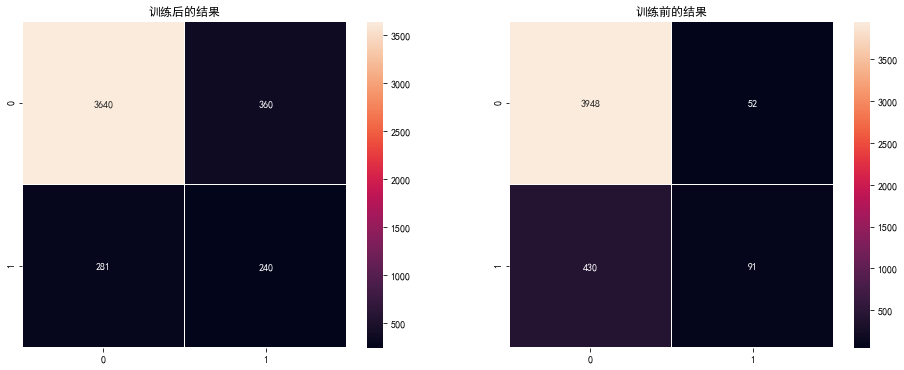

In [95]:
plt.figure(figsize = (16,6))
plt.subplot(121)
sns.heatmap(confusion_matrix(test_y, predict_result), annot = True, fmt = '.5g',linewidth = 0.5)
plt.title("训练后的结果")

plt.subplot(122)
sns.heatmap(confusion_matrix(test_y, rf_1_predict), annot = True, fmt = '.5g',linewidth = 0.5)
plt.title("训练前的结果")
plt.show()

In [96]:
print(classification_report(test_y, predict_result))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4000
           1       0.40      0.46      0.43       521

    accuracy                           0.86      4521
   macro avg       0.66      0.69      0.67      4521
weighted avg       0.87      0.86      0.86      4521



In [97]:
# 对比原来的结果
print(classification_report(test_y, rf_1_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.64      0.17      0.27       521

    accuracy                           0.89      4521
   macro avg       0.77      0.58      0.61      4521
weighted avg       0.87      0.89      0.87      4521



## ROC

In [98]:
# roc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(
    y_true=test_y,
    y_score=predict_result
)

In [99]:
auc = auc(fpr, tpr)
auc

0.6853262955854126

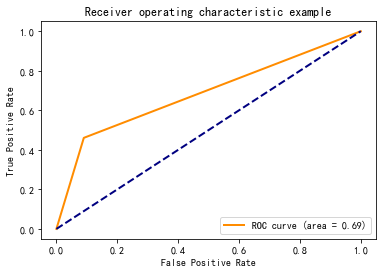

In [100]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## feature importance

In [101]:
# 制作data frame 并查看结果
features = pd.DataFrame({"feature": var_x, "score":final_model.feature_importances_ })
features.sort_values(by = "score",inplace = True, ascending = False)
features

,feature,score
8,month,0.161885
13,poutcome,0.152741
0,contact,0.122883
2,age,0.096580
7,housing,0.085521
1,balance,0.081417
6,day,0.081150
4,previous,0.052579
15,是否联系过,0.035486
14,weekday,0.023839


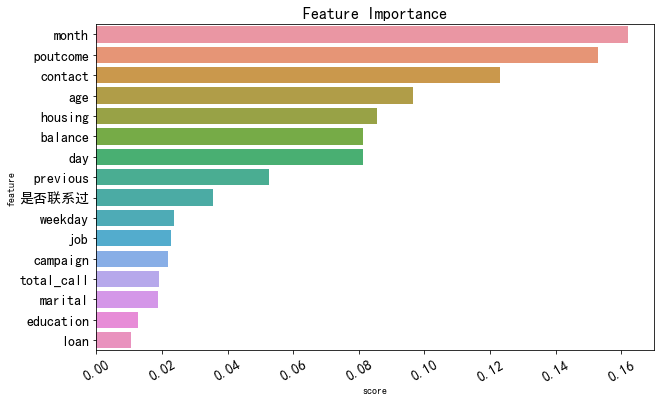

In [102]:
# 画图
plt.figure(figsize = (10,6))
sns.barplot(y = "feature", x = "score", data = features, orient = 'h' )
plt.title("Feature Importance", size = 16)
plt.xticks(rotation = 30, size = 14)
plt.yticks(size = 14)
plt.show()